In [4]:
import sys
sys.path.append('../cmake-build-release-gcc/src/python/')
import pyslise as ps

In [5]:
n = 2

def Vpt(x, n, a):
    return -n/cosh(a*x)^2

def f(x):
    v0 = Vpt(x, 45., 1.)
    v1 = Vpt(x, 39./2, 1./2)
    return matrix(RDF, [[v0+v1, v0-v1], [v0-v1,v0+v1]])
    

scs = ps.Pyscs(f, n, 0, 20, 64)

In [21]:
y0 = [matrix.zero(n), matrix.identity(n)]
scs.propagate(3, y0, 0, 2)

((array([[756.1489047 , 197.00615493],
         [197.00615493, 756.1489047 ]]),
  array([[-2383.30016731,  -164.35943511],
         [ -164.35943511, -2383.30016731]])),
 (array([[-120.32332999,  -32.30831828],
         [ -32.30831828, -120.32332999]]), array([[489.49428128,  72.69459312],
         [ 72.69459312, 489.49428128]])))

In [6]:
def error(E):
    (yl, dyl),_ = scs.propagate(E, (matrix.zero(2), matrix.identity(2)), 0,5)
    (yr, dyr),_ = scs.propagate(E, (matrix.zero(2), matrix.identity(2)), 10,5)
    return matrix(RDF, dyl*yl^-1 - dyr*yr^-1).det()

def error2(E):
    return matrix(scs.propagatePsi(E, matrix.identity(2), 0, 5) - scs.propagatePsi(E, matrix.identity(2), 10, 5)).det()

def prop(E, start, end, begin):
    t = ode_solver()
    t.function = lambda x, y: y[2:4]+list(f(x)*vector(y[0:2]) - E*vector(y[0:2]))
    t.t_span = [start, end]
    t.y_0 = begin
    return t

In [9]:
E = -64
B = 0
M = 3
t = prop(E, B, M, [0,0,1,0])
t.ode_solve(num_points=2000)
s = prop(E, B, M, [0,0,0,1])
s.ode_solve(num_points=2000)

In [10]:
def sm_eig(m):
    return min((abs(e), e) for e in matrix(m).eigenvalues())[1]
def detm(m):
    return det(matrix(m))

dets = [(x, detm([y0[2:], y1[2:]])) for (x, y0), (_, y1) in zip(t.solution, s.solution)]

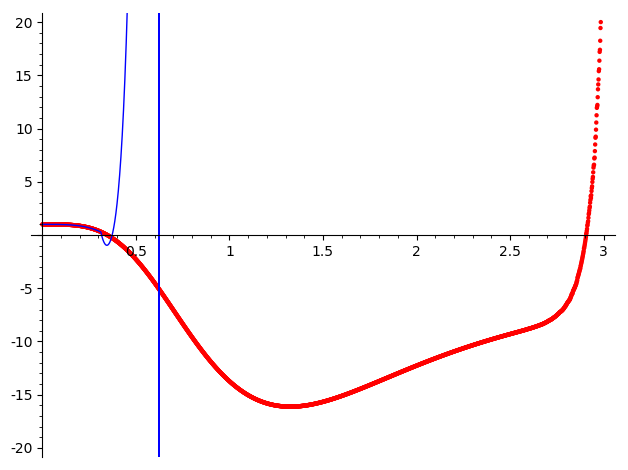

In [11]:
(
    list_plot(dets, color="red")
    + plot(lambda x: detm(scs.propagate(E,  (matrix.zero(2), [[1,0],[0,1]]), B, x)[0][1]), (min(B, M),3))
).show(ymax=20, ymin=-20)

In [7]:
def psi_calculator(y0, y1):
    den = matrix([y0[2:], y1[2:]])
    if abs(det(den)) < 0.00000001:
        return matrix.identity(2)
    return matrix([y0[:2], y1[:2]]) / den
psis = [(x, sm_eig(psi_calculator(y0, y1))) for (x, y0), (_, y1) in zip(t.solution, s.solution)]

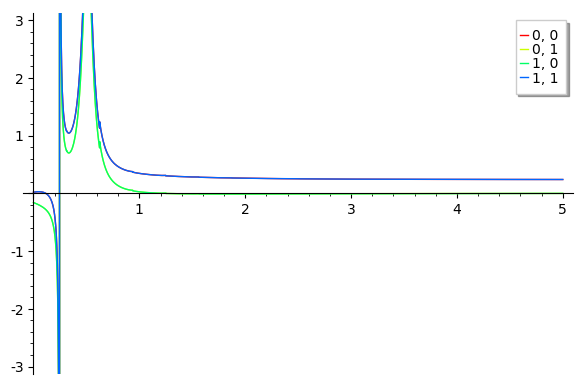

In [8]:
#(list_plot(psis, color="red")
E = -70
def check(m):
    return matrix(scs.propagatePsi(E,  [[0,0],[0,0]], B, m)) - matrix(scs.propagatePsi(E, [[0,0],[0,0]], 10, m))

sum(plot(lambda m: check(m)[i][j], (0,5), color=hue((2*i+j)/5), legend_label="%d, %d"%(i,j)) for i in range(2) for j in range(2)).show(ymin=-3, ymax=3)

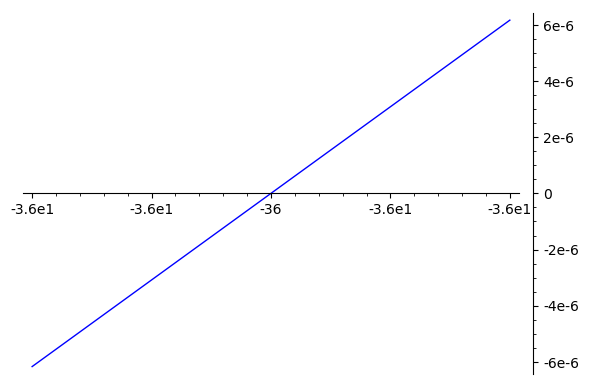

In [9]:
d = 0.0001

def error(E):
    m = .6
    return detm(scs.propagatePsi(E, matrix.zero(2), 0, m) - scs.propagatePsi(E, matrix.zero(2), 10, m))

plot(lambda E: error(E), (-36-d,-36+d))

In [10]:
E = find_root(error, -60, -64.003)
print E
x= 3

def prop(x, start=0, start_Y=matrix.zero(2), start_dY=matrix.identity(2)):
    (y, _), _ = scs.propagate(E, (start_Y, start_dY), start,x)
    return matrix(y).det()


-64.0000001322


In [60]:
error(-64.0000008697)

5.536129617045921e-05

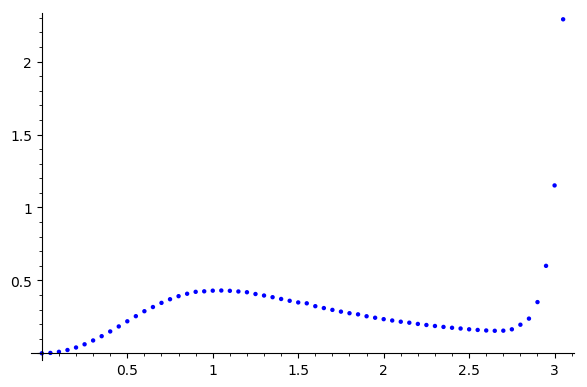

In [61]:
step_size = 0.05
xs = [0.]
ys = [matrix.zero(2)]
dys = [matrix.identity(2)]
scaling = [1]

x = 0
while x < 3:
    x += step_size
    (y, dy), _ = scs.propagate(E, (ys[-1], dys[-1]), xs[-1], x)
    
    f = matrix(y).norm()
    scaling.append(scaling[-1]*f)
    xs.append(x)
    ys.append(y/f)
    dys.append(dy/f)

list_plot(zip(xs, map(det, map(matrix, [y*s for s, y in zip(scaling, ys)]))))

In [66]:
m.rows()

NameError: name 'm' is not defined

In [126]:
dy

array([[ 5.49212455, -5.49212455],
       [-5.49212455,  5.49212455]])